# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
from datetime import date

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
!ls

 boro_population.csv	     NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
'Dataset TWO - Dogs.ipynb'   zipcodes-neighborhoods.csv


In [3]:
df= pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx',nrows=30000)

df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29940 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
'Each row is a dog license registered up to Apr 28 2016. "Animal birth" is the birth date of the dog and "Animal gender" its gender'

'Each row is a dog license registered up to Apr 28 2016. "Animal birth" is the birth date of the dog and "Animal gender" its gender'

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [6]:
# What breed type is most likely to be trained? And guarded?
# Is there any relation between zip codes and dog's colors?
# What about vaccinated and animal birth?
# In which year do we have more licenses issued?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df['Primary Breed'].value_counts()

Unknown                   4777
Yorkshire Terrier         1882
Shih Tzu                  1760
Chihuahua                 1535
Maltese                   1133
                          ... 
Welsh Springer Spaniel       1
Borzoi                       1
Smooth Fox Terrier           1
Curly-Coated Retriever       1
Mudi                         1
Name: Primary Breed, Length: 251, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [8]:
df[df['Primary Breed'] != 'Unknown'].value_counts('Primary Breed')

Primary Breed
Yorkshire Terrier              1882
Shih Tzu                       1760
Chihuahua                      1535
Maltese                        1133
Labrador Retriever             1074
                               ... 
Spinone Italiano                  1
Smooth Fox Terrier                1
Small Munsterlander Pointer       1
Curly-Coated Retriever            1
Mudi                              1
Length: 250, dtype: int64

## What are the most popular dog names?

In [9]:
df['Animal Name'].value_counts()

UNKNOWN               203
Max                   202
Unknown               197
Bella                 193
Charlie               172
                     ... 
ACKLEY                  1
Ebony Luck              1
PELUCHIN                1
Bandita                 1
GABBY SCOTT TAYLOR      1
Name: Animal Name, Length: 13721, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [10]:
df[df['Animal Name'].str.contains('Adrian', na=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
12191,10314,Adrian,F,Labrador Retriever,NaN,BLACK,NaN,NaN,2013-07-01,Yes,No,Yes,2015-06-11 16:07:35.113,2015-06-11,2016-06-30
12988,11378,Adriane,F,American Bully,NaN,White,NaN,NaN,2013-09-01,Yes,NaN,Yes,2015-06-14 18:43:10.920,2015-06-14,2016-06-14


In [11]:
df[(df['Animal Name'] == 'Max') | (df['Animal Name'] == 'Maxwell')].value_counts('Animal Name')

Animal Name
Max        202
Maxwell     11
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [12]:
df['Guard or Trained'].value_counts(normalize= True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [13]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [14]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [15]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df['Guard or Trained'] = np.where(df['Guard or Trained'].isna(), 'No', df['Guard or Trained'])



In [17]:
df['Guard or Trained'].value_counts(dropna=False)

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Unknown                       5
German Shepherd Dog           3
Schnauzer, Miniature          1
German Shepherd Crossbreed    1
Doberman Pinscher             1
Yorkshire Terrier             1
Rottweiler                    1
Shih Tzu                      1
Labrador Retriever            1
Golden Retriever              1
Poodle, Standard              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [19]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [20]:
df['age'] =  date.today().year - df.year
df.age.mean().round()

12.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [21]:
zip = pd.read_csv('zipcodes-neighborhoods.csv')

zip


,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [22]:
df = df.merge(zip,left_on='Owner Zip Code',right_on='zip')
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,11,Jamaica,11436,Queens
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,18,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,12,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,17,Jamaica,11436,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [23]:
df['Animal Name'] = df['Animal Name'].str.lower()

In [24]:
list = ['Bronx','Upper East Side','Brooklyn']

df['neighborhood'].unique()

# No Upper East Side

array(['Upper West Side', 'Southeast Bronx', 'Greenwich Village and Soho',
       'East Harlem', 'Upper East Side', 'Sunset Park',
       'Gramercy Park and Murray Hill', 'Southwest Brooklyn',
       'Northwest Brooklyn', 'South Shore', 'Lower East Side',
       'Borough Park', 'East New York and New Lots', 'Central Brooklyn',
       'Kingsbridge and Riverdale', 'Chelsea and Clinton',
       'Stapleton and St. George', 'Northeast Queens',
       'Canarsie and Flatlands', 'Southern Brooklyn', 'Northwest Queens',
       'West Central Queens', 'Bronx Park and Fordham', 'Lower Manhattan',
       'High Bridge and Morrisania', 'Inwood and Washington Heights',
       'Jamaica', 'Greenpoint', 'Northeast Bronx', 'Central Harlem',
       'Central Queens', 'Bushwick and Williamsburg', 'North Queens',
       'Mid-Island', 'Southeast Queens', 'West Queens', 'Port Richmond',
       'Rockaways', 'Southwest Queens', 'Flatbush',
       'Hunts Point and Mott Haven', 'Central Bronx'], dtype=object)

In [25]:
ignore_list = ['unknown', 'no name']

# transform to regex
ignore_list = '|'.join(ignore_list)

df = df[~df['Animal Name'].str.contains(ignore_list,na = False)]

neighborhood_list = ['Bronx','Upper East Side','Brooklyn']
neighborhood_list = '|'.join(neighborhood_list)

ranking = df[(df['neighborhood'].str.contains(neighborhood_list))].groupby(['neighborhood'],as_index=False).agg(
    total=pd.NamedAgg(column = 'Animal Name', aggfunc=pd.Series.mode))

ranking

,neighborhood,total
0,Bronx Park and Fordham,max
1,Central Bronx,"[gizmo, teddy]"
2,Central Brooklyn,"[max, prince, ruby]"
3,Northeast Bronx,rocky
4,Northwest Brooklyn,charlie
5,Southeast Bronx,max
6,Southern Brooklyn,rocky
7,Southwest Brooklyn,charlie
8,Upper East Side,charlie


## What is the most common dog breed in each of the neighborhoods of NYC?

In [26]:
df[df['Primary Breed'] != 'Unknown'].groupby('neighborhood')['Primary Breed'].agg(pd.Series.mode)

neighborhood
Borough Park                                                     Yorkshire Terrier
Bronx Park and Fordham                                           Yorkshire Terrier
Bushwick and Williamsburg                                        Yorkshire Terrier
Canarsie and Flatlands                                                    Shih Tzu
Central Bronx                                                    Yorkshire Terrier
Central Brooklyn                                                          Shih Tzu
Central Harlem                                                           Chihuahua
Central Queens                                                   Yorkshire Terrier
Chelsea and Clinton                                                      Chihuahua
East Harlem                                                      Yorkshire Terrier
East New York and New Lots       [American Pit Bull Terrier/Pit Bull, Chihuahua...
Flatbush                                                                  

## What breed of dogs are the least likely to be spayed? Male or female?

In [27]:
# df[df['Primary Breed'] != 'Unknown'].groupby(by=['Spayed or Neut'])['Primary Breed'].agg(pd.Series.mode)

In [28]:
# Unfinished 
# df[df['Primary Breed'] != 'Unknown'].groupby(by=['Spayed or Neut','Animal Gender'])['Primary Breed'].agg(pd.Series.mode)

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [29]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.lower()

colors = ['black','white','grey']
# transform to regex
colors = '|'.join(colors)

df['monochrome'] = np.where(df['Animal Dominant Color'].str.contains(colors,na=False), True, False)

df[df['monochrome'] == True].info()

# 14412 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14412 entries, 1 to 29572
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          14412 non-null  int64         
 1   Animal Name             14381 non-null  object        
 2   Animal Gender           14412 non-null  object        
 3   Primary Breed           14412 non-null  object        
 4   Secondary Breed         1997 non-null   object        
 5   Animal Dominant Color   14412 non-null  object        
 6   Animal Secondary Color  10603 non-null  object        
 7   Animal Third Color      3225 non-null   object        
 8   Animal Birth            14412 non-null  datetime64[ns]
 9   Spayed or Neut          14412 non-null  object        
 10  Guard or Trained        14412 non-null  object        
 11  Vaccinated              14412 non-null  object        
 12  Application Date        14412 non-null  dateti

<ipython-input-29-d5a937ab00eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Animal Dominant Color'] = df['Animal Dominant Color'].str.lower()
<ipython-input-29-d5a937ab00eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monochrome'] = np.where(df['Animal Dominant Color'].str.contains(colors,na=False), True, False)


## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:ylabel='borough'>

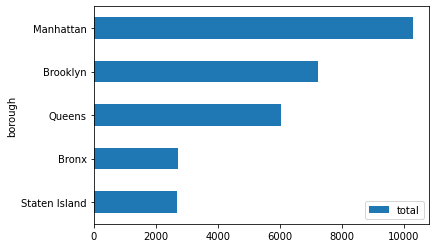

In [30]:
boro = pd.DataFrame(df.groupby(by='borough').size())
boro.columns = ['total']
boro.sort_values('total').plot.barh()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [31]:
pop = pd.read_csv('boro_population.csv')

pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [32]:
boro = boro.merge(pop,left_on='borough',right_on='borough')
boro

,borough,total,population,area_sqmi
0,Bronx,2713,1455444,42
1,Brooklyn,7226,2636735,71
2,Manhattan,10287,1644518,23
3,Queens,6042,2339150,109
4,Staten Island,2679,474558,59


In [33]:
boro['dog_per_capita'] = boro['total']/boro['population'].round(1)

boro.sort_values('dog_per_capita',ascending=False).head(1)


,borough,total,population,area_sqmi,dog_per_capita
2,Manhattan,10287,1644518,23,0.006255


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [34]:
# # Unfinished
# top_breed = pd.DataFrame(df.groupby('borough')['Primary Breed'].value_counts())

# top_breed.columns = ['total']


In [35]:

# top_breed.sort_values('total', ascending=False).groupby('Primary Breed').head(5).sort_index()

In [36]:
# df.sort_values('Count', ascending=False).groupby('Primary Breed').head(2).sort_index()

## What percentage of dogs are not guard dogs?

In [37]:
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.944727
Yes     0.055273
Name: Guard or Trained, dtype: float64